In [35]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [36]:
crabs = pd.read_csv("crab-groups.csv")

In [37]:
crabs

,site,latitude,n,mean_mm,min_mm,max_mm,sd_mm,median_mm,date
0,GTM,30.0,28,12.40,7.55,14.9,1.80,12.60,2016-07-24
1,SI,31.4,30,9.85,6.64,13.6,1.79,9.55,2016-07-26
2,NIB,33.3,30,13.30,8.52,17.3,2.42,13.30,2016-07-28
3,ZI,34.0,35,12.10,8.05,15.7,2.01,12.00,2016-07-29
4,RC,34.7,25,12.50,9.40,17.6,2.34,12.10,2016-08-01
5,VCR,37.2,30,16.30,11.70,21.4,2.94,16.00,2016-08-09
6,DB,39.1,30,15.60,11.50,20.4,2.12,15.10,2016-08-07
7,JC,39.6,30,15.30,9.58,20.9,2.72,15.40,2016-08-08
8,CT,41.3,33,14.70,11.00,19.5,2.36,15.50,2016-08-09
9,NB,41.6,29,17.10,13.20,21.9,2.29,17.20,2016-07-28


In [31]:
# Store relevant columns as variables
X = crabs[['latitude']].astype(int)
y = crabs[['mean_mm']].astype(int)

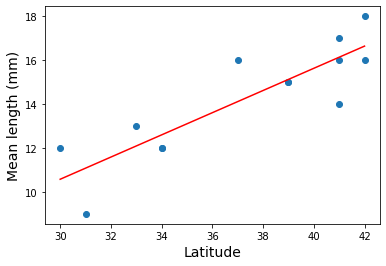

In [32]:
# Logistic regression predicting diagnosis from tumor radius
linearModel = LinearRegression()
linearModel.fit(X,np.ravel(y.astype(int)))

xDelta = np.linspace(X.min(),X.max(),1000)
y_pred = linearModel.intercept_ + linearModel.coef_*xDelta
# Graph logistic regression probabilities
plt.scatter(X,y)
plt.plot(xDelta,y_pred, color='red')
plt.xlabel('Latitude',fontsize=14);
plt.ylabel('Mean length (mm)',fontsize=14);

In [17]:
str(round(linearModel.coef_[0],3))

'0.505'

In [22]:
np.ravel(y)

array([12,  9, 13, 12, 12, 16, 15, 15, 14, 17, 16, 16, 18])

In [44]:
crabs.describe()

,latitude,n,mean_mm,min_mm,max_mm,sd_mm,median_mm
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,37.615385,30.153846,14.665385,9.743846,19.115385,2.457692,14.703846
std,4.451750,3.236411,2.465545,1.841533,3.043257,0.778440,2.592012
min,30.000000,25.000000,9.850000,6.640000,13.600000,1.790000,9.550000
25%,34.000000,28.000000,12.500000,8.520000,17.300000,2.050000,12.600000
50%,39.100000,30.000000,15.300000,9.580000,19.800000,2.300000,15.400000
75%,41.600000,30.000000,16.300000,11.000000,21.400000,2.420000,16.700000
max,42.700000,37.000000,18.500000,13.200000,23.400000,4.810000,18.400000


In [45]:
crabs.corr()

,latitude,n,mean_mm,min_mm,max_mm,sd_mm,median_mm
latitude,1.000000,0.161194,0.881750,0.706218,0.896497,0.440289,0.903020
n,0.161194,1.000000,-0.032696,-0.141328,0.163035,0.580328,0.083368
mean_mm,0.881750,-0.032696,1.000000,0.757035,0.921507,0.370037,0.984881
min_mm,0.706218,-0.141328,0.757035,1.000000,0.734594,0.108260,0.715875
max_mm,0.896497,0.163035,0.921507,0.734594,1.000000,0.639915,0.935096
sd_mm,0.440289,0.580328,0.370037,0.108260,0.639915,1.000000,0.465979
median_mm,0.903020,0.083368,0.984881,0.715875,0.935096,0.465979,1.000000


In [50]:
np.corrcoef(crabs["latitude"], crabs["mean_mm"])

array([[1.        , 0.88174996],
       [0.88174996, 1.        ]])